In [9]:
from netCDF4 import Dataset
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd


In [38]:
def find_data(region, year, tech, **kwargs):
    
    elcc_100 = Dataset('../wecc_results.nc').variables[region+' '+str(year)+' 100 MW '+tech][:]
    elcc_1000 = Dataset('../wecc_results.nc').variables[region+' '+str(year)+' 1 GW '+tech][:]
    elcc_5000 = Dataset('../wecc_results.nc').variables[region+' '+str(year)+' 5 GW '+tech][:]

    generator_size = np.array([np.ones(elcc_100.size)*100,np.ones(elcc_1000.size)*1000,np.ones(elcc_5000.size)*5000])
    elcc = np.array([elcc_100.flatten(),elcc_1000.flatten(),elcc_5000.flatten()])

    if 'separate' in kwargs:
        if kwargs['separate'] == True:
            return elcc_100.flatten(), elcc_1000.flatten(), elcc_5000.flatten()
    
    return generator_size, elcc

In [19]:
def find_corr(generator_size, elcc):
    return np.corrcoef(elcc.flatten(),generator_size.flatten())[0,1]

In [20]:
def plot_corr(ax, region, year, tech):
    generator_size, elcc = find_data(region, year, tech)

    r = find_corr(generator_size,elcc)
    ax.scatter(generator_size,elcc,c='#000000',s=1)
    ax.set_xlabel('Generator Capacity (MW)')
    ax.set_ylabel('ELCC')
    ax.set_title(' '.join([region.capitalize(),tech.capitalize(),'Pearson Coeff:',str(round(r,3))]))


In [21]:
correlation = pd.DataFrame()

In [24]:
for region in ['basin','california','mountains','northwest','southwest']:
    for year in [2018]:
        for tech in ['solar','wind']:
            generator_size, elcc = find_data(region,year,tech)
            correlation.at[region,tech] = find_corr(generator_size, elcc) 

In [25]:
correlation.to_csv('2018_generator_size_correlation.csv')

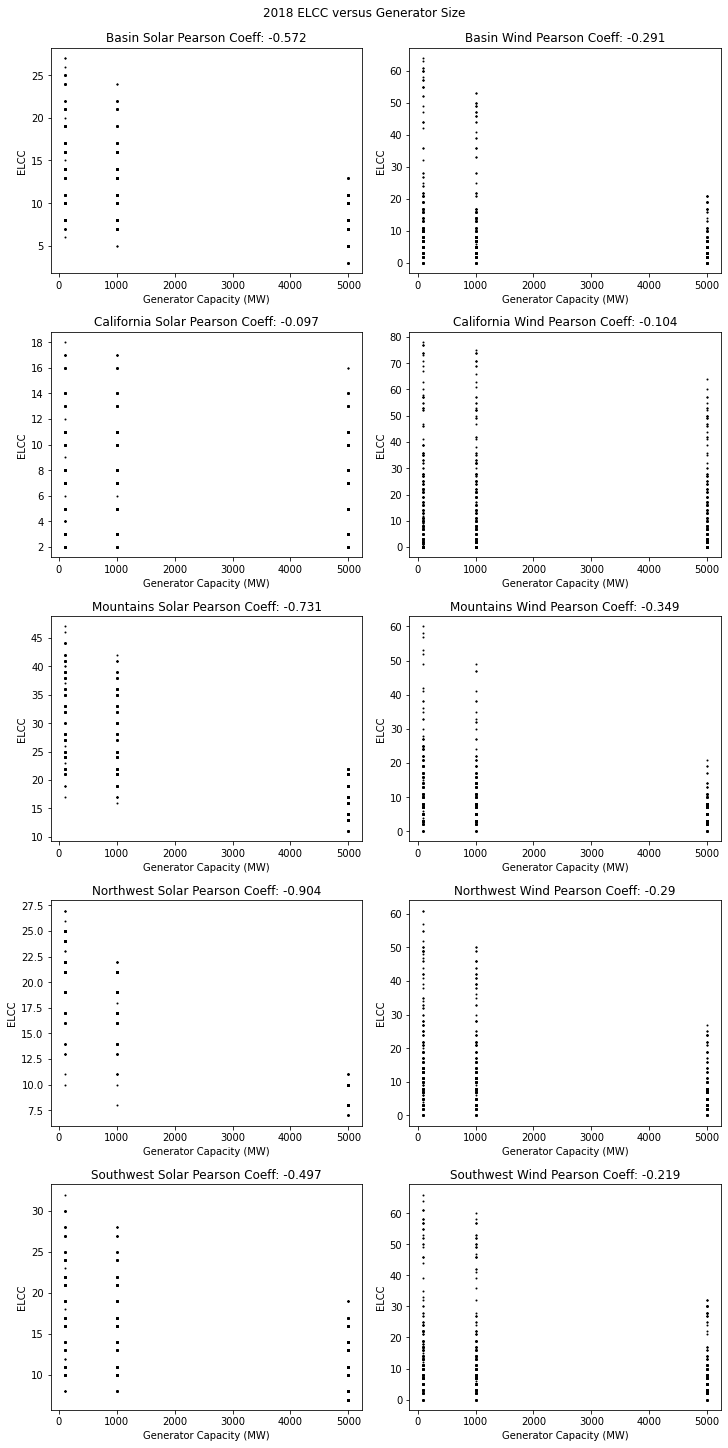

In [30]:
fig, axs = plt.subplots(5,2,figsize=(10,20),constrained_layout=True)

i = 0
for region in ['basin','california','mountains','northwest','southwest']:
    for year in [2018]:
        for tech in ['solar','wind']:
            plot_corr(axs[i // 2, i % 2],region,year,tech)
            i += 1

plt.suptitle('2018 ELCC versus Generator Size')
plt.savefig('2018_generator_size_correlation.png')

Line Plot for Individual Generators:

In [114]:
def plot_line(ax, region, year, tech):
    elcc_100, elcc_1000, elcc_5000 = find_data(region,year,tech,separate=True)
    elcc = np.array([elcc_100,elcc_1000,elcc_5000]).T

    ax.plot([1,2,3],elcc.T,lw=.5)
    ax.set_xlabel('Generator Capacity (MW)')
    ax.set_xticks([1,2,3])
    ax.set_xticklabels(['100','1000','5000'])
    ax.set_ylabel('ELCC')
    ax.set_title(' '.join([region.capitalize(),tech.capitalize()]))



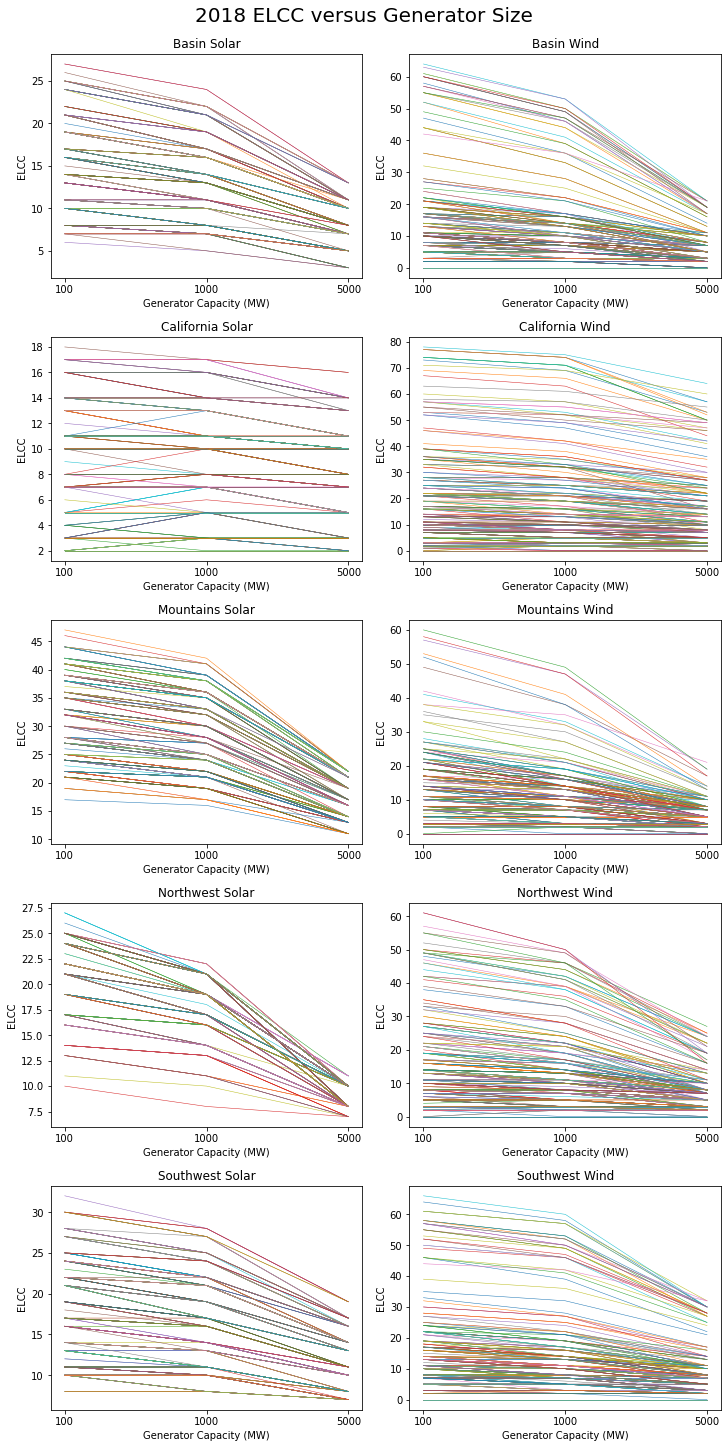

In [116]:
fig, axs = plt.subplots(5,2,figsize=(10,20),constrained_layout=True)

i = 0
for region in ['basin','california','mountains','northwest','southwest']:
    for year in [2018]:
        for tech in ['solar','wind']:
            plot_line(axs[i // 2, i % 2],region,year,tech)
            i += 1

plt.suptitle('2018 ELCC versus Generator Size',fontsize=20)
plt.savefig('fig_3_tmp.png')
